# gelu

GELU（Gaussian Error Linear Unit）和ReLU（Rectified Linear Unit）都是激活函数，用于在神经网络中引入非线性，但它们的数学形式和特性有所不同。

这里是两种激活函数的基本描述：

1. ReLU激活函数：
ReLU 是一种非常简单的激活函数，它的数学表达式是：
f(x) = max(0, x)

ReLU函数的特点是负数部分的输出为零，而正数部分的输出等于输入本身。ReLU的优点是运算简单，并且可以缓解梯度消失问题（尤其在正数部分）。它的缺点是它可能会导致神经元“死亡”，也就是说，在训练过程中，一些神经元可能不再对任何数据点有活动（输出始终为0），因此不再对网络的学习贡献梯度更新。

2. GELU激活函数：
GELU是一种平滑的非线性激活函数，大致可以认为是ReLU的柔化版本。它受高斯分布的启发，并通过插入随机正则化来近似激活函数。GELU的数学表达式较为复杂，一个近似的形式是：
f(x) = 0.5 * x * (1 + tanh(sqrt(2/pi) * (x + 0.044715 * x^3)))

GELU函数由于其平滑性，在输入接近零时，它允许一些小的梯度传递（与ReLU不同，ReLU在负半轴直接截断为0），这可能帮助学习过程。GELU被用于像BERT这样的高级深度学习模型中，并展示了很好的性能。

总结它们的主要区别：
- ReLU在0以下直接截断，而GELU在0以下和以上都有一个渐变的过渡。
- GELU相对于ReLU是平滑的，可以产生更加连续的梯度。
- ReLU计算上更为简单和高效；相比之下，GELU计算更复杂，但一些深度学习库已经对其进行了优化。
- GELU可能在训练更复杂的模型时有更好的性能，但可能导致过拟合，在简单模型上效果可能不如ReLU。

应用时的选择通常基于任务的复杂度、训练数据的特性以及网络的深度。理论和实验研究都表明，不同的任务和网络架构可能会更适合使用不同的激活函数。

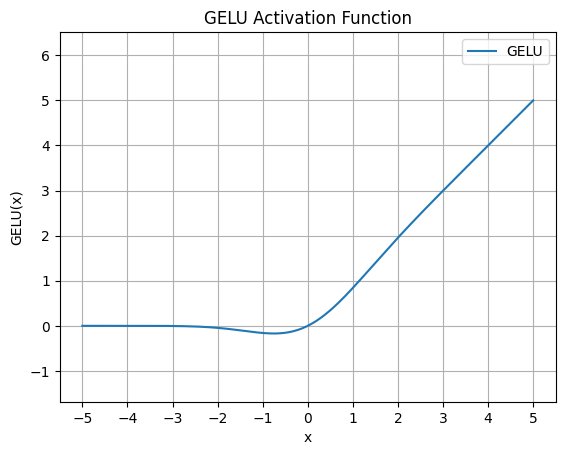

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # 导入ticker模块

# 定义GELU激活函数
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

# 生成一系列的x值
x = np.linspace(-5, 5, 200)

# 计算对应的y值
y = gelu(x)

# 绘制GELU激活函数的图
plt.plot(x, y, label="GELU")
plt.xlabel("x")
plt.ylabel("GELU(x)")
plt.title("GELU Activation Function")
plt.axis('equal')
plt.legend()
plt.grid()

# 设置x轴和y轴的主要刻度间隔为1
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

GELU（Gaussian Error Linear Unit）激活函数的提出并非是通过传统的数学推导得到的，而是基于启发式的方法和实验性的观察。它被设计用来近似一个神经元的输出在带有随机噪声的条件下的期望。换言之，GELU考虑的是，当神经元的输入被噪声干扰时，该神经元在某种程度上是活跃的还是不活跃的概率。

GELU的原始表达式由Dan Hendrycks和Kevin Gimpel在2016年他们的论文中提出。在这篇论文中，他们定义了GELU如下：

$$ \text{GELU}(x) = xP(X \leq x) $$

在这里，$ P(X \leq x) $是输入$ X $小于或等于$ x $的值的标准高斯（正态）分布的累积分布函数（CDF）。对于标准高斯分布，累积分布函数可以用无穷级数或积分形式表示，但在实践中这样的形式并不方便直接计算。

因此，论文作者提供了一个近似的解析形式：

$$ \text{GELU}(x) \approx 0.5 x \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}}(x + 0.044715x^3)\right]\right) $$

这个近似表达式的设计是基于实验性的选择，以便它既能够保持接近于原始GELU表达的形式，又能提供易于计算的表达式。使用了$\tanh$函数，其本身是一个S形的函数，它帮助提供了一种平滑的过渡，既可以对小于0的值提供非零梯度，又能够在较大的正值处饱和。

重要的是，GELU激活函数并不是从某些基本原理或公理系统中数学推导出来的，而是基于经验观察并通过实验验证其效果的。GELU函数在他们实验中表现出了良好的性能，并被广泛用于许多神经网络应用，尤其是在自然语言处理领域。

## standard normal cdf

标准正态分布指的是均值为0，标准差为1的正态分布。其概率密度函数公式为：

$$ f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} $$

对于标准正态分布的累计概率，即密度函数的积分，我们通常关心的是从负无穷到某个值x的积分，这定义了标准正态分布函数，记为Φ(x)：

$$ \Phi(x) = \int_{-\infty}^x f(t)\,dt = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{t^2}{2}}\,dt $$

不幸的是，这个积分没有闭合形式的解（即不能用基本的初等函数表示）。因此，在实际应用中，我们通常会查询标准正态分布表，或者使用计算机软件来获得数值结果。

另外，寻求给定x值对应的累积概率Φ(x)时，由于标准正态分布的对称性，我们可以通过查表或软件计算来找到对应的概率值。例如，Φ(0) = 0.5，因为标准正态分布是关于y轴对称的，所以位于均值左侧的概率是0.5，位于均值右侧的概率也是0.5。对于任何x > 0，累积概率Φ(x) > 0.5，而对于任何x < 0，累积概率Φ(x) < 0.5。

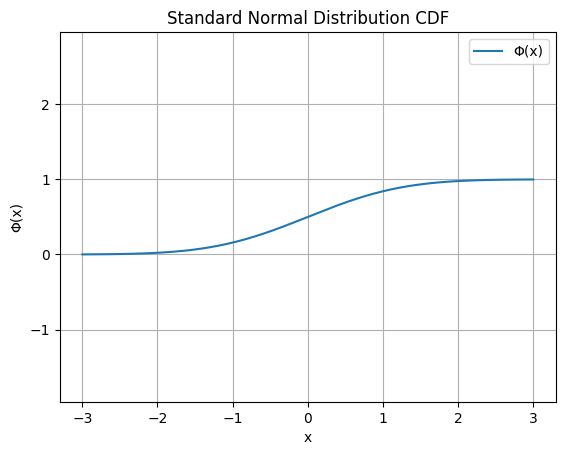

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 标准正态分布的概率密度函数
def standard_normal_pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

# 标准正态分布的分布函数（累积概率）
def standard_normal_cdf(x):
    return norm.cdf(x)

# 生成一个x值的范围，比如从-3到3，包含1000个点
x = np.linspace(-3, 3, 1000)

# 计算对应的标准正态分布的分布函数值
cdf_values = standard_normal_cdf(x)

# 绘制CDF
plt.plot(x, cdf_values, label='Φ(x)')

# 图表的标题和标签
plt.title('Standard Normal Distribution CDF')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('Φ(x)')

# 显示图例
plt.legend()

# 显示图表
plt.grid(True)
plt.show()

"PDF"和"CDF"在统计学和概率论中分别代表概率密度函数（Probability Density Function）和累积分布函数（Cumulative Distribution Function）。它们是用来描述随机变量的行为的两种不同方法。

1. 概率密度函数 (PDF)
   PDF是连续随机变量的概念，它描述了在任何一点附近观测到该随机变量的值的概率。对于连续随机变量，这个函数表明在任意两点之间随机变量取值的概率与这两点之间曲线下面积的比例。PDF的关键特性是非负性，并且其在所有可能取值上的积分为1。

2. 累积分布函数 (CDF)
   CDF是一个随机变量在一个定值以下的概率，是PDF的积分。它给出了随机变量取值小于或等于特定值的概率。CDF是一个非减函数，它的取值范围从0到1，其中0表示该随机变量几乎不可能取值于某一区间内，而1表示该随机变量几乎肯定在那个区间内取值。

举例来说，如果X是连续随机变量，则其PDF f(x)可以解释为在x附近单位长度区间上随机取值的相对可能性，而它的CDF F(x)则告诉我们该随机变量取值落在负无穷至x间的概率是多少。在数学表示上，CDF可以通过下面的积分来从PDF求得：

F(x) = ∫[从负无穷到x] f(t) dt

# silu

在PyTorch中，`torch.nn.functional.silu`或者在模块形式`torch.nn.SiLU`指的是Sigmoid-Weighted Linear Unit (SiLU) 激活函数，也被称为SiL或者Swish-1函数。Swish函数是由Google Brain团队提出的，SiLU是Swish函数的一种特殊形式。SiLU激活函数的数学表达式定义如下：
$$
SiLU(x) = x * sigmoid(x) = \frac{x}{1 + e^{-x}}
$$
其中sigmoid(x)是标准的Sigmoid函数：$sigmoid(x) = \frac{1}{1 + e^{-x}}$。

SiLU激活函数是一种平滑、非单调的函数，它在输入值小于零时接近零，在输入值大于零时接近线性。这使得它可以在一定程度上兼顾ReLU的稀疏激活属性和Sigmoid的平滑梯度特性。

由于SiLU函数中x与sigmoid(x)都是输入的函数，所以它可以被认为是自门控（self-gating），x可以看作是门控信号，控制着自己的流动。

SiLU函数在实践中已经证明可以提供一定的性能提升，相比于其他激活函数（如ReLU、tanh等），在某些深度学习任务中可能会获得更好的结果。在PyTorch中，您可以很容易地在神经网络中使用SiLU激活函数，只需要通过调用`torch.nn.functional.silu`或者实例化一个`torch.nn.SiLU`模块对象并作为网络层的一部分。